In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Provided functions (we have to modify this)
def get_ksize(sigma):
    return int(((sigma - 0.8)/0.15) + 2.0)

def get_gaussian_blur(img, ksize=0, sigma=5):
    if ksize == 0:
        ksize = get_ksize(sigma)
    sep_k = cv2.getGaussianKernel(ksize, sigma)
    return cv2.filter2D(img, -1, np.outer(sep_k, sep_k))

def ssr(img, sigma):
    img = img.astype('float32') / 255  # Convert to float and normalize
    blurred = get_gaussian_blur(img, sigma=sigma)
    return np.log10(img + 1e-6) - np.log10(blurred + 1e-6)




In [39]:
# Load an image
image_path = '/home/eaguiraud/Documents/34269_computer_imaging_and_spectroscopy/low_light_enhancement/images/dark_img_2.png'  # Update this path
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB



In [40]:
# Apply SSR
sigma = 30  # Example sigma value, adjust based on your needs
ssr_img = ssr(img, sigma)

# Normalize SSR image for display
ssr_img_normalized = cv2.normalize(ssr_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)



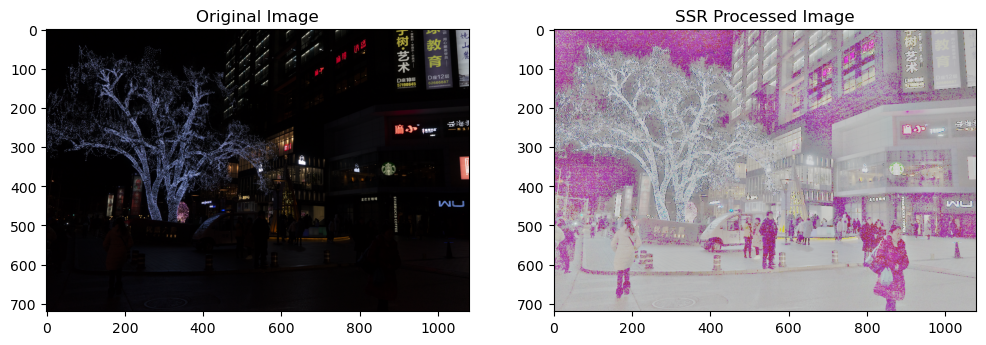

In [41]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(ssr_img_normalized)
plt.title('SSR Processed Image')

plt.show()